# MRI and Alzheimers 
## Early Diagnose of Dementia Using MRI Data in Nondemented and Demented Older Adults 
### Huiyu (Shirley) Sun

![](dementia.jpg)

#### Neuroimaging is among the most promising areas of research focused on early detection of Alzheimer's disease. 




## Data
###### Data Source: Open Access Series of Imaging Studies (OASIS) http://www.oasis-brains.org

#### Data Features (150 subjects)
- Subject ID
- MRI ID
- Visit
- MR Delay
###### Demographic
- M/F
- Hand - Right hand
- Age - (60 - 98)
- EDUC (years)
- SES - Socioeconomic status 1: less than high school grad., 2: high school grad., 3: some college, 4: college grad., 5: beyond college.
###### Clinical
- MMSE - Mini-Mental State Examination (commonly used set of questions for screening cognitive function; 0-10 = Severe, 10-20 = Moderate; 20-25 = Mild; 25-30 = Questionably Significant)
- CDR - Clinical Dementia Rating (CDR; 0 = nondemented; 0.5 = very mild dementia; 1 = mild dementia; 2 = moderate dementia) (Morris, 1993). All participants with dementia (CDR >0) were diagnosed with probable AD.
###### Derived anatomic volumes
- eTIV - Estimated total intracranial volume
- nWBV - Normalized whole brain volume
- ASF - Atlas scaling factor
###### Response to be predicted
- Group - Demented, Nondemented, Converted

## Import Data

##### Longitudinal Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# read the longitudinal and cross sections MRI data
mri_long = pd.read_csv('oasis_longitudinal.csv', sep = ',')
display(mri_long.head(), mri_long.shape)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


(373, 15)

##### Cross Sectional Dataset

In [2]:
mri_cross = pd.read_csv('oasis_cross-sectional.csv', sep = ',')
display(mri_cross.head(), mri_cross.shape)

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


(436, 12)

In [3]:
# retain cross sectional data with age 60 - 96, keep consistent with the longitudial data
mri_cross1 = mri_cross[(mri_cross['Age'] >= 60) & (mri_cross['Age'] <= 96)] # 198s
mri_cross1['Visit'] = 1 # create Visit = 1 for all subjects (defined by the metadata)
mri_cross1['MR Delay'] = 0 # MR Delay = 0 for all first visit subjects

mri_cross1.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Visit,MR Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN,1,0
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN,1,0
8,OAS1_0010_MR1,M,R,74,5.0,2.0,30.0,0.0,1636,0.689,1.073,NaN,1,0
11,OAS1_0013_MR1,F,R,81,5.0,2.0,30.0,0.0,1664,0.679,1.055,NaN,1,0
13,OAS1_0015_MR1,M,R,76,2.0,NaN,28.0,0.5,1738,0.719,1.010,NaN,1,0


In [4]:
# display(mri_cross1.isnull().sum())
mri_cross2 = mri_cross1.drop(['ID', 'Hand', 'Delay'], axis = 1)
mri_cross2 = mri_cross2.dropna()

display(mri_cross2.head(), mri_cross2.shape)

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Visit,MR Delay
0,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,1,0
2,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,1,0
8,M,74,5.0,2.0,30.0,0.0,1636,0.689,1.073,1,0
11,F,81,5.0,2.0,30.0,0.0,1664,0.679,1.055,1,0
14,M,82,2.0,4.0,27.0,0.5,1477,0.739,1.188,1,0


(180, 11)

In [5]:
# closer look to the CDR score and Group labeles (both could be considered as response)
# CDR: early diagnose of Dementia 
# we cannot predict converted, so we will convert converted to Demented later
mri_long.groupby(['CDR', 'Group']).size().unstack()

Group,Converted,Demented,Nondemented
CDR,,,
0.0,18.0,NaN,188.0
0.5,19.0,102.0,2.0
1.0,NaN,41.0,NaN
2.0,NaN,3.0,NaN


In [6]:
# missing values
# I'll remove the missing values because they are correlated with age and education, hard to impute
mri_long.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

## Pre-Process

In [7]:
# Drop the trivial/unrelated predictors
df = mri_long
df = df.drop(['Subject ID', 'MRI ID', 'Hand'], axis = 1)
display(df.head(), df.shape)

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


(373, 12)

###### Feature Engineering

In [8]:
# Feature engineering (not sure whether it is useful, but it proved to be a unnecessary step)
# MMSE Scores Mini-Mental State Examination - Ordinal
# Ref: https://www.heartandstroke.ca/-/media/pdf-files/canada/clinical-update/allen-huang-cognitive-screening-toolkit.ashx?la=en&hash=631B35521724C28268D0C2130D07A401E33CDBB0
# 25-30 (Questionably significant); 20-25 (Mild); 10-20 (Moderate); 0-10 (Severe)
# However, as tested, the original MMSE tells more story
def mmse_group(col):
    if col <= 10:
        return "Severe"
    elif 10 < col <= 20:
        return "Moderate"
    elif 20 < col <= 25:
        return "Mild"
    elif 25 < col <= 30:
        return "Questionably significant"
    else:
        return "missing"

def mmse_code(col):
    if col <= 10:
        return "3"
    elif 10 < col <= 20:
        return "2"
    elif 20 < col <= 25:
        return "1"
    elif 25 < col <= 30:
        return "0"
    else:
        return "-1"
df['MMSE Group'] = df['MMSE'].apply(mmse_group)
df['MMSE Group'].value_counts(sort = True)

df['MMSE_code'] = df['MMSE'].apply(mmse_code)
df.head()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,MMSE Group,MMSE_code
0,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883,Questionably significant,0
1,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876,Questionably significant,0
2,Demented,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046,Mild,1
3,Demented,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010,Questionably significant,0
4,Demented,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034,Mild,1


In [9]:
# Encode the categorical predictors 
# M/F(gender), Group
from sklearn.preprocessing import LabelEncoder

# M/F F = 0, M = 1
df['Gender_code'] = LabelEncoder().fit_transform(df['M/F'])

# 0.0 (0), 0.5 (1), 1 (2)
df['CDR_code']= LabelEncoder().fit_transform(df['CDR'])

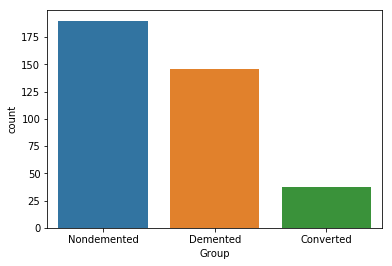

In [10]:
# Demented > ND at patients' initial visit
sns.countplot(x = 'Group', data = df)

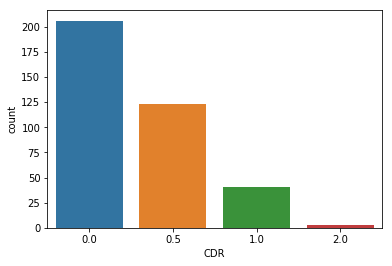

In [11]:
# CDR
sns.countplot(x = 'CDR', data = df)

In [12]:
# Converted --> Demented
# Group Demented = 0, Nondemented = 1
df['Group'] = df['Group'].replace(['Converted'],['Demented'])
df['Group_code'] = LabelEncoder().fit_transform(df['Group'])

df[['M/F', 'Gender_code', 'Group', 'Group_code']].head()

,M/F,Gender_code,Group,Group_code
0,M,1,Nondemented,1
1,M,1,Nondemented,1
2,M,1,Demented,0
3,M,1,Demented,0
4,M,1,Demented,0


In [13]:
# recoded data
display(df.info(), df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 17 columns):
Group          373 non-null object
Visit          373 non-null int64
MR Delay       373 non-null int64
M/F            373 non-null object
Age            373 non-null int64
EDUC           373 non-null int64
SES            354 non-null float64
MMSE           371 non-null float64
CDR            373 non-null float64
eTIV           373 non-null int64
nWBV           373 non-null float64
ASF            373 non-null float64
MMSE Group     373 non-null object
MMSE_code      373 non-null object
Gender_code    373 non-null int64
CDR_code       373 non-null int64
Group_code     373 non-null int64
dtypes: float64(5), int64(8), object(4)
memory usage: 49.6+ KB


None

Index(['Group', 'Visit', 'MR Delay', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE',
       'CDR', 'eTIV', 'nWBV', 'ASF', 'MMSE Group', 'MMSE_code', 'Gender_code',
       'CDR_code', 'Group_code'],
      dtype='object')

## Data Exploration

###### Pairwise plot

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


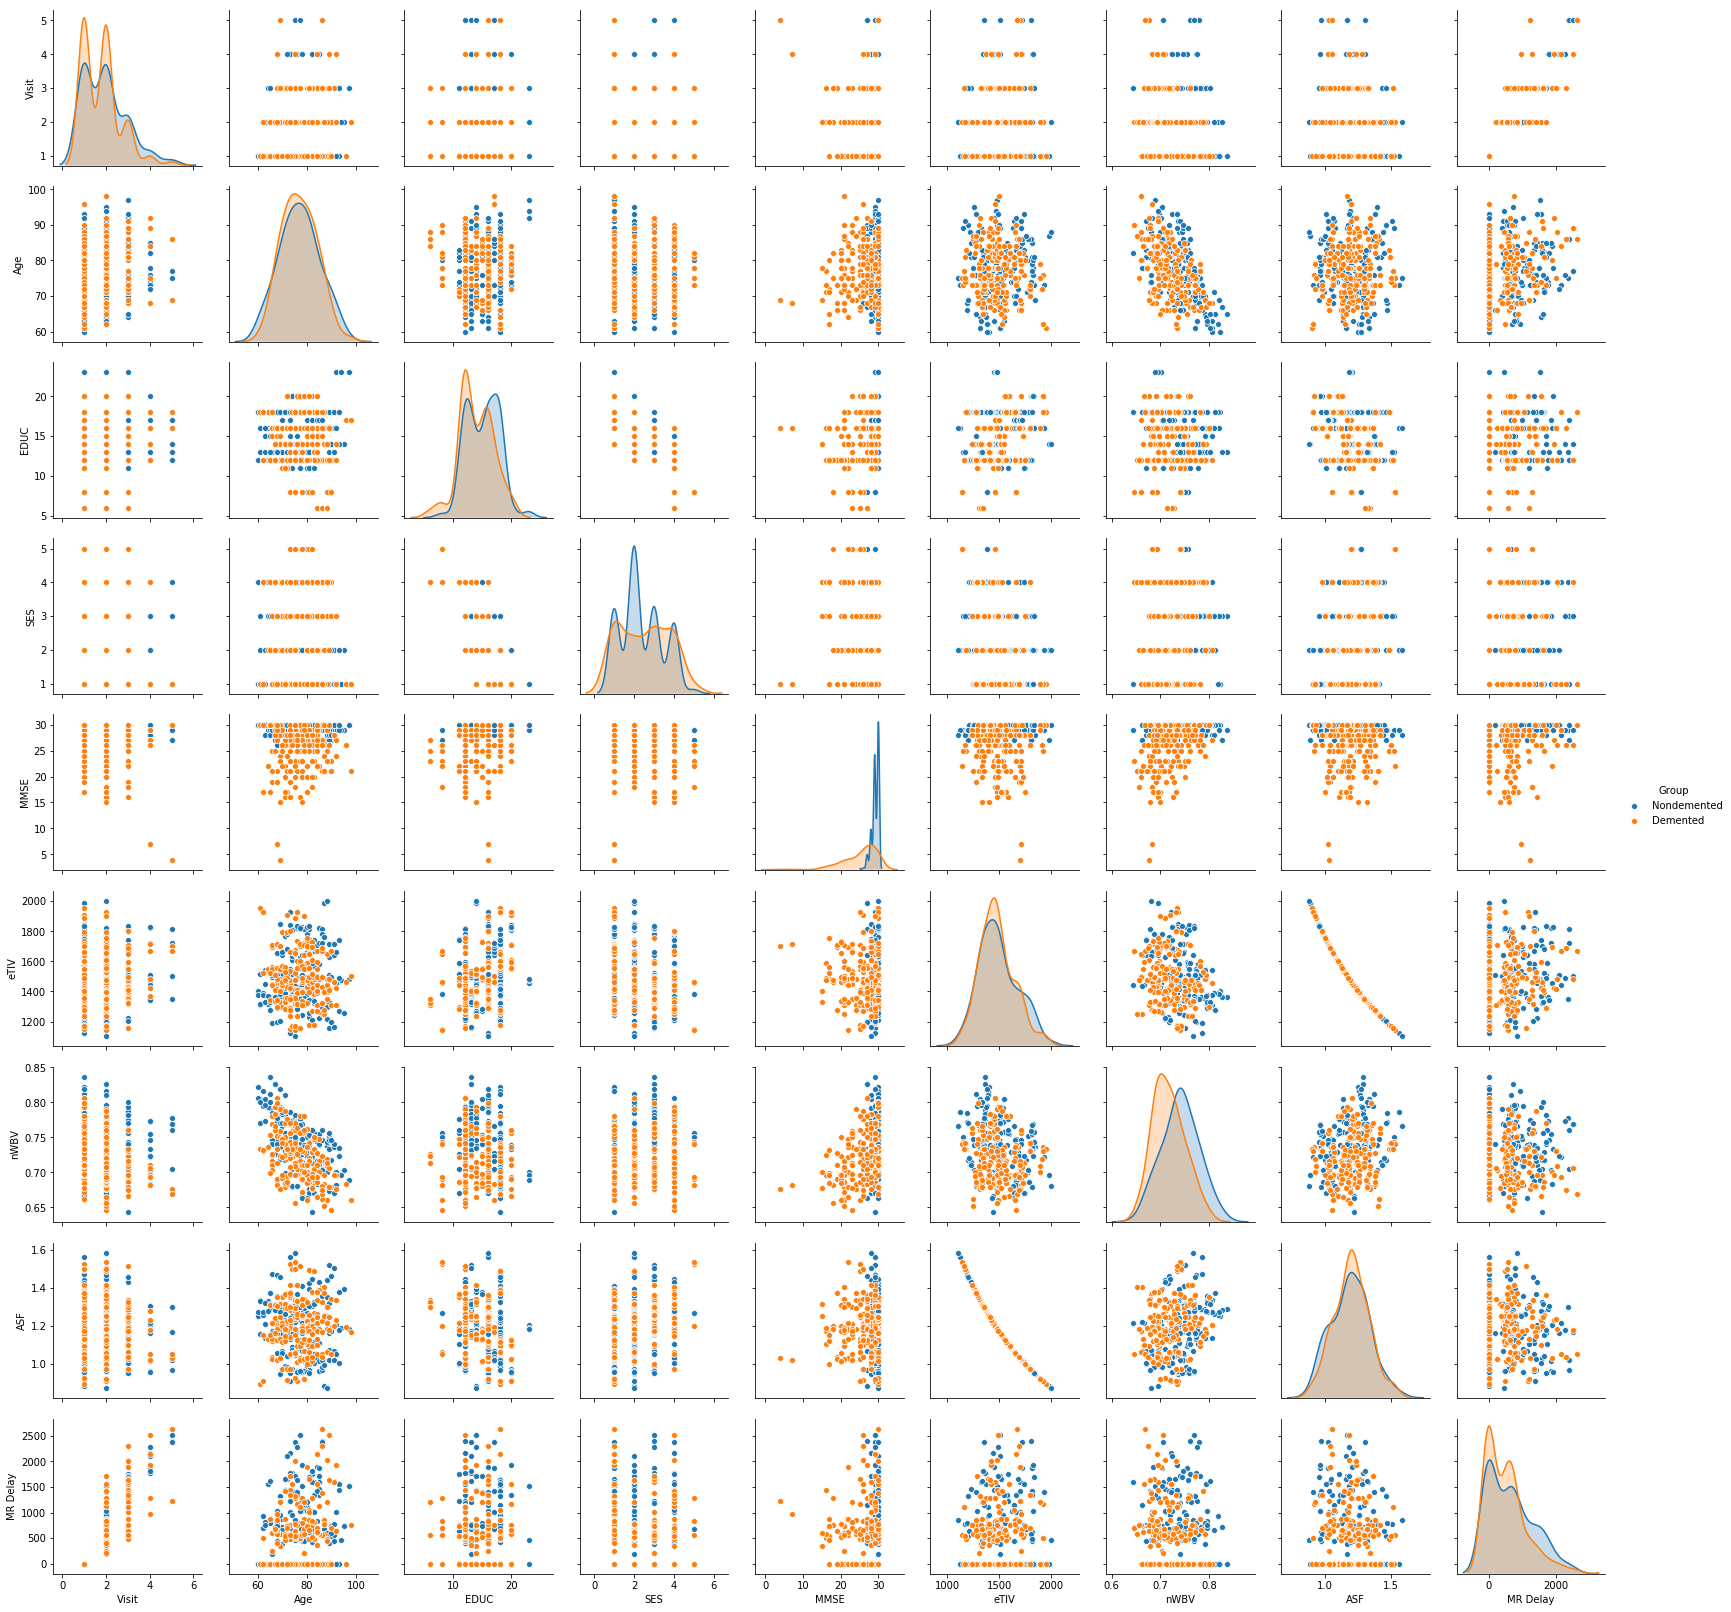

In [14]:
# multicolinearity exists
# related predictors: Age ~ -nWBV; eTIV ~ -nWBV; eTIV ~ -ASF
cols1 = ['Group', 'M/F', 'Visit', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV','ASF','MR Delay']
df1 = df[cols1]
sns.pairplot(df1, hue = 'Group')

###### Single Predictor

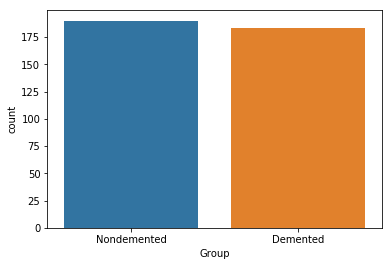

In [15]:
# Nondemented > Demented in this sample
sns.countplot(x = 'Group', data = df)

Text(0.5,0,'Age')

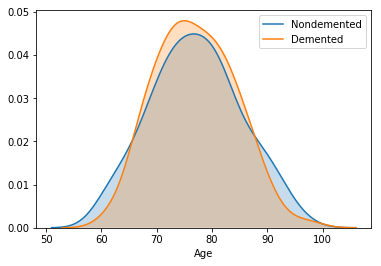

In [16]:
# Age
# Demented subjects has shorter range of age distrubition
# more demented people at age 67 - 88
sns.kdeplot(df.Age[df.Group=='Nondemented'], label='Nondemented', shade=True)
sns.kdeplot(df.Age[df.Group=='Demented'], label='Demented', shade=True)
plt.xlabel('Age')

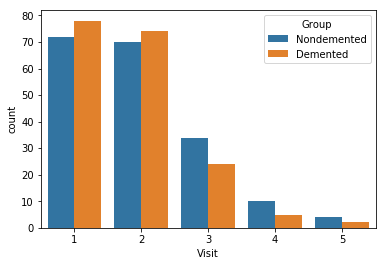

In [17]:
# Visit
# depend on this sample, this doesn't mean anything
sns.countplot(x = 'Visit', hue ='Group', data = df)

Text(0.5,0,'Years of Education')

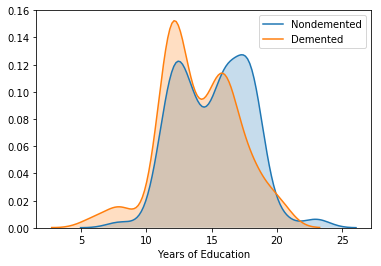

In [18]:
# Years of education
# More Demented people with less years of education
sns.kdeplot(df.EDUC[df.Group=='Nondemented'], label='Nondemented', shade=True)
sns.kdeplot(df.EDUC[df.Group=='Demented'], label='Demented', shade=True)
plt.xlabel('Years of Education')

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


Text(0.5,0,'SocialEconomics Status')

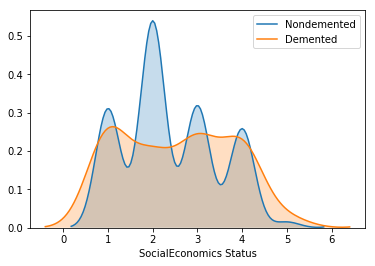

In [19]:
# SES (socialeconomics status)
# Demented population shows smoother SES
sns.kdeplot(df.SES[df.Group=='Nondemented'], label='Nondemented', shade=True)
sns.kdeplot(df.SES[df.Group=='Demented'], label='Demented', shade=True)
plt.xlabel('SocialEconomics Status')

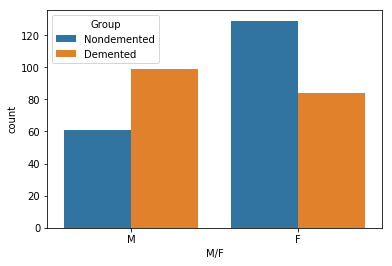

In [20]:
# Gender: M/F
# Demented male > ND male ; ND female > Demented female
# female less likely to be Demented than male
sns.countplot(x = 'M/F', hue = 'Group', data = df)

###### Dimention Reduction

In [21]:
df_rmna = df.dropna()
x_cols = ['Gender_code', 'Visit', 'Age', 'EDUC', 'SES', 'MMSE_code', 'CDR_code', 'eTIV', 'nWBV', 'ASF', 'MR Delay']
x_cols = ['Gender_code', 'Visit', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR_code', 'eTIV', 'nWBV', 'ASF', 'MR Delay']
x_cols = ['Gender_code', 'Visit', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF', 'MR Delay']
# x_cols = ['Gender_code', 'Visit', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'MR Delay']

X = df_rmna[x_cols]
y = df_rmna['Group_code'].astype('category')

In [22]:
def scatterplot_2D(R, title, labels=None):
    """ Helper function to plot data points in 2D
        Requires (N, 2) numpy array shape
    """
    assert(R.shape[1] == 2)
    # class labels are turned into colors
    if labels is None:
        c = 'black'
    else:
        color_scale = np.linspace(0, 1, len(set(labels)))
        c = [plt.cm.Set1(color_scale[i]) for i in labels]

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.patch.set_facecolor('white')
    ax.scatter(R[...,0], R[...,1], color=c)
    ax.axis('square')
    ax.set_xlabel('R1')
    ax.set_ylabel('R2')
    fig.suptitle(title)
    plt.show()

[[ 3.91173804e-05  1.33243766e-03  2.49217004e-03  2.12072423e-04
  -5.89406572e-05  4.24955588e-04  3.53570132e-02 -6.14209630e-06
  -2.87161730e-05  9.99370634e-01]
 [ 1.61626063e-03  5.21108576e-05  6.25283893e-04  4.38559860e-03
  -1.68724080e-03 -6.20248515e-04  9.99361629e-01 -4.22874227e-05
  -7.68670108e-04 -3.53591754e-02]]
[93.  7.]


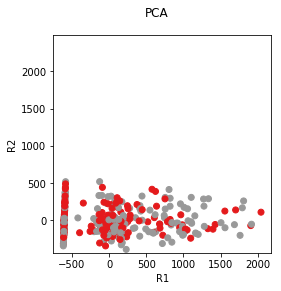

In [23]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
print(pca.components_)
print(np.round(pca.explained_variance_ratio_ * 100))
R_PCA = pca.transform(X)
scatterplot_2D(R_PCA, 'PCA', y)

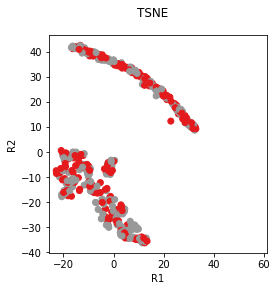

(354, 10)
(354, 2)


In [24]:
# TSNE
from sklearn.manifold import TSNE
R_TSNE = TSNE(n_components=2, perplexity=20).fit_transform(X)
scatterplot_2D(R_TSNE, 'TSNE', y)
print(X.shape)
print(R_TSNE.shape)

## Modeling
- Logistic Regression
- Decision Tree
- Random Forest
- Gradient Boosting
- Naive Bayes
- KNN
- SVM

###### Split train, test data & Scaling

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# remove NA
df_rmna = df.dropna()

# X, y
x_cols = ['Gender_code', 'Visit', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'MR Delay']
# x_cols = ['Gender_code', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'MR Delay']

X = df_rmna[x_cols]
y = df_rmna['Group_code'].astype('category')

# Training & Test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

num_cols = ['Visit', 'Age', 'EDUC', 'SES', 'eTIV', 'nWBV', 'MMSE']
# num_cols = ['Age', 'EDUC', 'SES', 'eTIV', 'nWBV', 'MMSE']

# normalization
# training set
X_train_norm = StandardScaler().fit_transform(X_train[num_cols])
training_norm_col = pd.DataFrame(X_train_norm, index = X_train[num_cols].index, columns = X_train[num_cols].columns)
X_train.update(training_norm_col)

# test set
X_test_norm = StandardScaler().fit_transform(X_test[num_cols])
test_norm_col = pd.DataFrame(X_test_norm, index = X_test[num_cols].index, columns = X_test[num_cols].columns)
X_test.update(test_norm_col)

# whole set
X_norm = StandardScaler().fit_transform(X[num_cols])
norm_col = pd.DataFrame(X_norm, index = X[num_cols].index, columns = X[num_cols].columns)
X.update(norm_col)


X_train.shape, y_train.shape, X_test.shape, y_test.shape

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler

((237, 9), (237,), (117, 9), (117,))

In [26]:
X_test.head()

,Gender_code,Visit,Age,EDUC,SES,MMSE,eTIV,nWBV,MR Delay
230,1,0.149565,0.800776,-1.230392,1.466054,0.414624,1.484825,-1.611983,766
48,0,0.149565,-0.776068,-0.897930,0.533835,0.693423,-0.705987,1.487111,609
298,0,0.149565,-0.513260,0.431916,0.533835,0.414624,-1.122469,1.182735,1707
189,1,-0.944131,-0.513260,1.096839,-0.398384,0.414624,0.366598,1.238076,0
62,0,-0.944131,0.275161,0.431916,-1.330603,0.414624,-0.101231,-0.698857,0


#### Logistic Regression

In [27]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import cross_val_score, KFold

lr = LogisticRegression(solver = 'lbfgs', max_iter=1000)

lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)

se_lr = np.round(mean_squared_error(y_test, y_predict),2)
acc_lr = np.round(accuracy_score(y_test, y_predict),2)
print('MSE:', se_lr)
print('Accuracy:', acc_lr)

MSE: 0.17
Accuracy: 0.83


In [28]:
from sklearn.ensemble import ExtraTreesClassifier

# feature importance
# selected MMSE, nWBV, eTIV, Age, Gender
model = ExtraTreesClassifier()
model.fit(X_test, y_test)
# display the relative importance of each attribute
display(X_train.columns, model.feature_importances_)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Index(['Gender_code', 'Visit', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV',
       'MR Delay'],
      dtype='object')

array([0.08143713, 0.0261351 , 0.11039058, 0.09744799, 0.10602528,
       0.27647204, 0.10158097, 0.12878856, 0.07172235])

#### Decision Tree

MSE: 0.24
Accuracy: 0.76


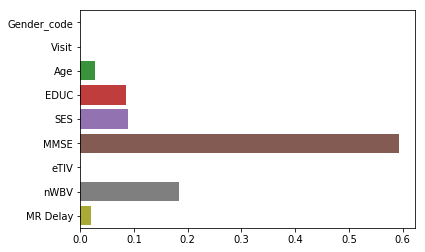

In [29]:
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier

dtr = DecisionTreeClassifier(max_depth = 5, random_state = 0)
dtr.fit(X_train, y_train)
y_predict = dtr.predict(X_test)

se_dtr = np.round(mean_squared_error(y_test, y_predict),2)
acc_dtr = np.round(accuracy_score(y_test, y_predict),2)
print('MSE:', se_dtr)
print('Accuracy:', acc_dtr)

fea_ip = dtr.feature_importances_
sns.barplot(x = fea_ip, y = X.columns)

#### Random Forest

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MSE: 0.24
Accuracy: 0.76


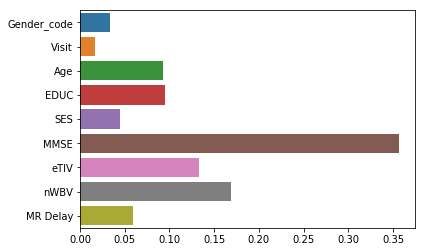

In [30]:
# Random Forest (bagging)
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(random_state = 123)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)
mean_squared_error(y_test, y_predict)

se_rf = np.round(mean_squared_error(y_test, y_predict),2)
acc_rf = np.round(accuracy_score(y_test, y_predict),2)
print('MSE:', se_rf)
print('Accuracy:', acc_rf)

fea_ip = rf.feature_importances_
sns.barplot(x = fea_ip, y = X.columns)

#### Gradient Boosting

MSE: 0.18
Accuracy: 0.82


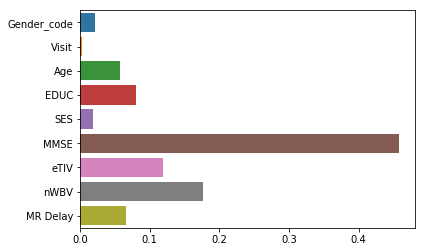

In [31]:
# Gradient Boosting (boosting)
# sequential improvement of models by training on their errors
# improves errors, one tree each step
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state = 0)
gb.fit(X_train, y_train)
y_predict = gb.predict(X_test)
mean_squared_error(y_test, y_predict)

se_gb = np.round(mean_squared_error(y_test, y_predict),2)
acc_gb = np.round(accuracy_score(y_test, y_predict),2)
print('MSE:', se_gb)
print('Accuracy:', acc_gb)

fea_ip = gb.feature_importances_
sns.barplot(x = fea_ip, y = X.columns)

#### Naive Bayes

In [32]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

y_predict = GaussianNB().fit(X_train, y_train).predict(X_test)

se_nb = np.round(mean_squared_error(y_test, y_predict),2)
acc_nb = np.round(accuracy_score(y_test, y_predict),2)
print('MSE:', se_nb)
print('Accuracy:', acc_nb)

MSE: 0.2
Accuracy: 0.8


#### SVM

In [33]:
# SVM
from sklearn.svm import SVC

clf = SVC(gamma='auto', random_state = 123)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

se_clf = np.round(mean_squared_error(y_test, y_predict),2)
acc_clf = np.round(accuracy_score(y_test, y_predict),2)
print('MSE:', se_clf)
print('Accuracy:', acc_clf)

MSE: 0.44
Accuracy: 0.56


#### KNN

In [34]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

y_predict = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train).predict(X_test)

se_knn = np.round(mean_squared_error(y_test, y_predict),2)
acc_knn = np.round(accuracy_score(y_test, y_predict),2)
print('MSE:', se_knn)
print('Accuracy:', acc_knn)

MSE: 0.48
Accuracy: 0.52


#### Comparison

Text(0.5,1,'Accuracy')

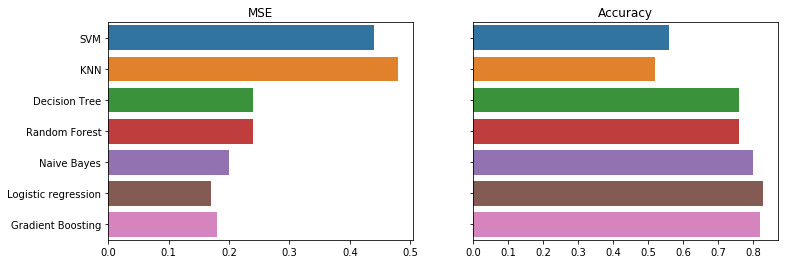

In [35]:
# visualize all methods
methods = ['SVM', 'KNN','Decision Tree', 'Random Forest', 'Naive Bayes', 'Logistic regression', 'Gradient Boosting']

se = [se_clf, se_knn, se_dtr, se_rf, se_nb, se_lr, se_gb]
acc = [acc_clf, acc_knn, acc_dtr, acc_rf, acc_nb, acc_lr, acc_gb]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
sns.barplot(x = se, y = methods, ax = ax1).set_title('MSE')
sns.barplot(x = acc, y = methods, ax = ax2).set_title('Accuracy')

###### Cross Validation

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

LR: 0.747464 (0.078604)
KNN: 0.636413 (0.074390)
CART: 0.776449 (0.067167)
RF: 0.785326 (0.085745)
GB: 0.807246 (0.104632)
NB: 0.751630 (0.108395)
SVM: 0.591304 (0.106426)


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

[Text(0,0,'LR'),
 Text(0,0,'KNN'),
 Text(0,0,'CART'),
 Text(0,0,'RF'),
 Text(0,0,'GB'),
 Text(0,0,'NB'),
 Text(0,0,'SVM')]

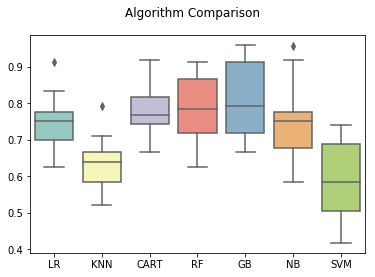

In [36]:
from sklearn.naive_bayes import GaussianNB

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=123)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
sns.boxplot(names, results, palette="Set3")
ax.set_xticklabels(names)

###### ROC

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


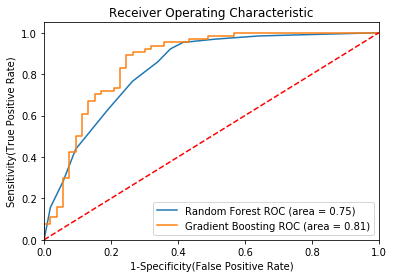

In [37]:
# ROC curve RandomForest and GradientBoosting 

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(),
},
{
    'label': 'Gradient Boosting',
    'model': GradientBoostingClassifier(),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y_test, model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
    
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

###### Confusion Matrix (Gradient Boosting)

Text(91.68,0.5,'Predicted Label')

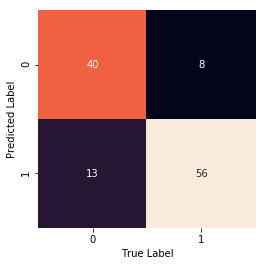

In [38]:
## confusion matrix -- GB
from sklearn.metrics import confusion_matrix

y_predict = GradientBoostingClassifier(random_state = 0).fit(X_train, y_train).predict(X_test)

mat = confusion_matrix(y_test, y_predict)
sns.heatmap(mat.T, square=True,annot = True, fmt="d", cbar=False)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

### Hyperparameter Tuning

In [39]:
from sklearn.model_selection import GridSearchCV

param_test = {'max_depth':range(3,12,4), 'min_samples_split':range(20, 300, 20)}
gsearch = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, n_estimators=60, 
                                                              max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test, scoring='neg_mean_squared_error',n_jobs=4, iid=False, cv=5)
gsearch.fit(X_train, y_train)
gsearch.best_estimator_, gsearch.best_score_, gsearch.best_params_, gsearch.n_splits_ 

(GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.05, loss='deviance', max_depth=3,
               max_features='sqrt', max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=20,
               min_weight_fraction_leaf=0.0, n_estimators=60,
               n_iter_no_change=None, presort='auto', random_state=10,
               subsample=0.8, tol=0.0001, validation_fraction=0.1,
               verbose=0, warm_start=False),
 -0.18636561007381675,
 {'max_depth': 3, 'min_samples_split': 20},
 5)

In [40]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.3, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring="neg_mean_squared_error")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

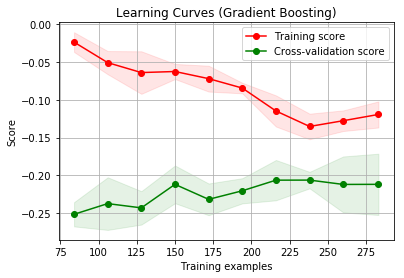

In [41]:
# test overfit
title = "Learning Curves (Gradient Boosting)"

# Create the CV iterator
cv_iterator = KFold(n_splits=5, shuffle=True, random_state=10)
model = GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.05, loss='deviance', max_depth=3,
               max_features='sqrt', max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=20,
               min_weight_fraction_leaf=0.0, n_estimators=60,
               presort='auto', random_state=10, subsample=0.8, verbose=0,
               warm_start=False)
plot_learning_curve(model, title, X_norm, y, cv=cv_iterator, n_jobs=4)
plt.show()

In [42]:
gb = GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.05, loss='deviance', max_depth=3,
               max_features='sqrt', max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=20,
               min_weight_fraction_leaf=0.0, n_estimators=60,
               presort='auto', random_state=10, subsample=0.8, verbose=0,
               warm_start=False)
gb.fit(X_train, y_train)
y_predict = gb.predict(X_test)
mean_squared_error(y_test, y_predict)

se_gb = np.round(mean_squared_error(y_test, y_predict),2)
acc_gb = np.round(accuracy_score(y_test, y_predict),2)
print('MSE:', se_gb)
print('Accuracy:', acc_gb)

MSE: 0.16
Accuracy: 0.84


In [43]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
import pprint

cv = StratifiedKFold(n_splits=5)
scores = cross_validate(gb, X, y, cv=cv,
                         scoring=('accuracy', 'f1_micro'),
                         return_train_score=True)
print('mean TRAIN accuracy: ', np.round(scores['train_accuracy'].mean(), 2))
print('mean TEST  accuracy: ', np.round(scores['test_accuracy'].mean(), 2))

mean TRAIN accuracy:  0.9
mean TEST  accuracy:  0.76
